## Assignment - A2.part2
### Devin Hall, Tyler Birnie
### Due: 3-2-22 @ 11:59pm
Some pre-requisites we will need for this project


In [19]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
import math as m
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split

In [20]:
# Here we define the data set used for questions 1 and 2 as a 2D matrix, with each row being sample #, Ytrue, Ypred
QUESTION_1_2_DATA = (
    [1, True, 0.98],
    [2, True, 0.92],
    [3, False, 0.87],
    [4, True, 0.76],
    [5, False, 0.74],
    [6, False, 0.61],
    [7, True, 0.57],
    [8, True, 0.38],
    [9, False, 0.34],
    [10, False, 0.32],
)

# Some enums to make array indexing more readable
SAMPLE_COLUMN = 0
YTRUE_COLUMN = 1
YPRED_COLUMN = 2

# A helper class to reduce chance of human error when dealing with confusion matrix data set
class ConfusionMatrixResult:
    def __init__(self, tp, fp, tn, fn):
        self.true_positives = tp
        self.false_positives = fp
        self.true_negatives = tn
        self.false_negatives = fn


# A helper function to take in a 2D array structured like above, and return # of true positives, false positives, true negatives, false negatives at a certain threshold
# contained as a ConfusionMatrixResult
def get_confusion_matrix(data, threshold) -> ConfusionMatrixResult:

    # setup the counts of the confusion matrix
    true_pos = 0
    false_pos = 0
    true_neg = 0
    false_neg = 0

    # Loop through all the data
    for row in data:
        # Extract the data
        sample_num: int = row[SAMPLE_COLUMN]
        actual_state: bool = row[YTRUE_COLUMN]
        predicted_state: float = row[YPRED_COLUMN]

        # Does this data fit in the threshold? i.e. is the predicted state >= threshold we defined
        in_threshold = predicted_state >= threshold

        # First consider the samples that are actually positive, (actual_state == True)
        if actual_state:

            # Is this in the threshold? i.e., did we make a correct prediction?
            if in_threshold:
                true_pos += 1  # This is a true positive
            else:
                false_neg += 1  # Our prediction was wrong, this will be marked as a false negative

        else:
            # Consider samples that are not positive, (actual_state == False)
            # If it isn't in the threshold, that means we guessed correctly that it is negative
            if not in_threshold:
                true_neg += 1  # This is a true negative
            else:
                false_pos += 1  # Our prediction was wrong, we thought this was going to be positive but it wasn't

    # Now that we looped through all the data, let's return the confusion matrix
    return ConfusionMatrixResult(tp=true_pos, fp=false_pos, tn=true_neg, fn=false_neg)

## (Question 1) For the following data set, compute the:

### 1.a: 
True positive rate

In [21]:
# Let's get the confusion matrices of 10 thresholds using the prediction values
# Use list comprehension to generate a list of all the pred columns for every row in the data
THRESHOLDS = [row[YPRED_COLUMN] for row in QUESTION_1_2_DATA]

# Now let's make a 2D array that we are going to print for the answer
_1a_ans = []

# Loop through all the different thresholds we want to use
for thresh in THRESHOLDS:
    # retrieve the confusion matrix using this threshold
    confusion_matrix = get_confusion_matrix(QUESTION_1_2_DATA, thresh)

    # TPR is true positives / (true positives + false negatives)
    tpr = float(confusion_matrix.true_positives) / float(confusion_matrix.true_positives + confusion_matrix.false_negatives)

    # Add this entry to the data we want to display in the format: [threshold, TPR]
    _1a_ans.append([thresh, tpr])

# Now display the data
cols = ['Threshold', 'TPR']
rows = [str(i+1) for i in range(10)]
pd.DataFrame(np.asarray(_1a_ans), index=rows, columns=cols)

,Threshold,TPR
1,0.98,0.2
2,0.92,0.4
3,0.87,0.4
4,0.76,0.6
5,0.74,0.6
6,0.61,0.6
7,0.57,0.8
8,0.38,1.0
9,0.34,1.0
10,0.32,1.0


### 1.b: 
False postive rate

In [22]:
# Note, this is essentially copied from 1a with one modified line
# Let's get the confusion matrices of 10 thresholds using the prediction values
# Use list comprehension to generate a list of all the pred columns for every row in the data
THRESHOLDS = [row[YPRED_COLUMN] for row in QUESTION_1_2_DATA]

# Now let's make a 2D array that we are going to print for the answer
_1b_ans = []

# Loop through all the different thresholds we want to use
for thresh in THRESHOLDS:
    # retrieve the confusion matrix using this threshold
    confusion_matrix = get_confusion_matrix(QUESTION_1_2_DATA, thresh)

    # FPR is false positives / (false positives + true negatives)
    fpr = float(confusion_matrix.false_positives) / float(confusion_matrix.false_positives + confusion_matrix.true_negatives)

    # Add this entry to the data we want to display in the format: [threshold, TPR]
    _1b_ans.append([thresh, fpr])

# Now display the data
cols = ['Threshold', 'FPR']
rows = [str(i+1) for i in range(10)]
pd.DataFrame(np.asarray(_1b_ans), index=rows, columns=cols)

,Threshold,FPR
1,0.98,0.0
2,0.92,0.0
3,0.87,0.2
4,0.76,0.2
5,0.74,0.4
6,0.61,0.6
7,0.57,0.6
8,0.38,0.6
9,0.34,0.8
10,0.32,1.0


### 1.c: 
Accuracy

In [23]:
# Note, this is essentially copied from 1a with one modified line
# Let's get the confusion matrices of 10 thresholds using the prediction values
# Use list comprehension to generate a list of all the pred columns for every row in the data
THRESHOLDS = [row[YPRED_COLUMN] for row in QUESTION_1_2_DATA]

# Now let's make a 2D array that we are going to print for the answer
_1c_ans = []

# Loop through all the different thresholds we want to use
for thresh in THRESHOLDS:
    # retrieve the confusion matrix using this threshold
    confusion_matrix = get_confusion_matrix(QUESTION_1_2_DATA, thresh)

    # ACC is (True positives) / (True positives + False positives)
    acc = float(confusion_matrix.true_positives) / float(confusion_matrix.true_positives + confusion_matrix.false_positives)

    # Add this entry to the data we want to display in the format: [threshold, TPR]
    _1c_ans.append([thresh, acc])

# Now display the data
cols = ['Threshold', 'Accuracy']
rows = [str(i+1) for i in range(10)]
pd.DataFrame(np.asarray(_1c_ans), index=rows, columns=cols)

,Threshold,Accuracy
1,0.98,1.000000
2,0.92,1.000000
3,0.87,0.666667
4,0.76,0.750000
5,0.74,0.600000
6,0.61,0.500000
7,0.57,0.571429
8,0.38,0.625000
9,0.34,0.555556
10,0.32,0.500000


Threshold the classifier output, Ypred, at each possible value (use a greater than equal to
comparison).
Report the results as a matrix/table with rows corresponding with the 10 thresholds and
columns reporting the different thresholds, the true positive rate (TPR), false positive rate
(FPR), and accuracy (ACC).

## (Question 2)
se the results from Question 1 to plot the ROC curve for the data. Note, plot this
curve using the standard plotting tools rather than any special library/package available in R,
Python, or Matlab for making ROC plots.

<AxesSubplot:xlabel='tpr'>

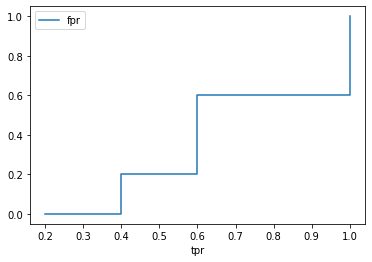

In [24]:
# To plot the ROC curve, we plot a TPR vs FPR graph
# Luckily, we can actually use our answers from before to snag all of our x,y pairs that we are going to plot
# Define a list of points to plot
_q2_x_points = []
_q2_y_points = []

# Loop through the data from before and construct our x and y points
for row in _1a_ans:
    tpr = row[1]
    _q2_x_points.append(tpr)

for row in _1b_ans:
    fpr = row[1]
    _q2_y_points.append(fpr)

# Now construct the dataframe
df = pd.DataFrame({
    'tpr': _q2_x_points,
    'fpr': _q2_y_points
})

df.style.set_caption("ROC Curve")

# Display the xy relationship
df.plot.line(x='tpr', y='fpr')

## (Question 3) Classificaiton of Spam

### 3.a: 
Load in the spambase data

In [25]:
# Some constants to define for ease of access of the data,
# Automatically generated using a python script
WORD_FREQ_MAKE = 'word_freq_make'
WORD_FREQ_ADDRESS = 'word_freq_address'
WORD_FREQ_ALL = 'word_freq_all'
WORD_FREQ_3D = 'word_freq_3d'
WORD_FREQ_OUR = 'word_freq_our'
WORD_FREQ_OVER = 'word_freq_over'
WORD_FREQ_REMOVE = 'word_freq_remove'
WORD_FREQ_INTERNET = 'word_freq_internet'
WORD_FREQ_ORDER = 'word_freq_order'
WORD_FREQ_MAIL = 'word_freq_mail'
WORD_FREQ_RECEIVE = 'word_freq_receive'
WORD_FREQ_WILL = 'word_freq_will'
WORD_FREQ_PEOPLE = 'word_freq_people'
WORD_FREQ_REPORT = 'word_freq_report'
WORD_FREQ_ADDRESSES = 'word_freq_addresses'
WORD_FREQ_FREE = 'word_freq_free'
WORD_FREQ_BUSINESS = 'word_freq_business'
WORD_FREQ_EMAIL = 'word_freq_email'
WORD_FREQ_YOU = 'word_freq_you'
WORD_FREQ_CREDIT = 'word_freq_credit'
WORD_FREQ_YOUR = 'word_freq_your'
WORD_FREQ_FONT = 'word_freq_font'
WORD_FREQ_000 = 'word_freq_000'
WORD_FREQ_MONEY = 'word_freq_money'
WORD_FREQ_HP = 'word_freq_hp'
WORD_FREQ_HPL = 'word_freq_hpl'
WORD_FREQ_GEORGE = 'word_freq_george'
WORD_FREQ_650 = 'word_freq_650'
WORD_FREQ_LAB = 'word_freq_lab'
WORD_FREQ_LABS = 'word_freq_labs'
WORD_FREQ_TELNET = 'word_freq_telnet'
WORD_FREQ_857 = 'word_freq_857'
WORD_FREQ_DATA = 'word_freq_data'
WORD_FREQ_415 = 'word_freq_415'
WORD_FREQ_85 = 'word_freq_85'
WORD_FREQ_TECHNOLOGY = 'word_freq_technology'
WORD_FREQ_1999 = 'word_freq_1999'
WORD_FREQ_PARTS = 'word_freq_parts'
WORD_FREQ_PM = 'word_freq_pm'
WORD_FREQ_DIRECT = 'word_freq_direct'
WORD_FREQ_CS = 'word_freq_cs'
WORD_FREQ_MEETING = 'word_freq_meeting'
WORD_FREQ_ORIGINAL = 'word_freq_original'
WORD_FREQ_PROJECT = 'word_freq_project'
WORD_FREQ_RE = 'word_freq_re'
WORD_FREQ_EDU = 'word_freq_edu'
WORD_FREQ_TABLE = 'word_freq_table'
WORD_FREQ_CONFERENCE = 'word_freq_conference'
CHAR_FREQ_SEMICOLON = 'char_freq_;'
CHAR_FREQ_L_PARENTH = 'char_freq_('
CHAR_FREQ_L_BRACKET = 'char_freq_['
CHAR_FREQ_EXCLAIM_POINT = 'char_freq_!'
CHAR_FREQ_DOLLAR_SIGN = 'char_freq_$'
CHAR_FREQ_HASHTAG = 'char_freq_#'
CAPITAL_RUN_LENGTH_AVERAGE = 'capital_run_length_average'
CAPITAL_RUN_LENGTH_LONGEST = 'capital_run_length_longest'
CAPITAL_RUN_LENGTH_TOTAL = 'capital_run_length_total'
IS_SPAM = 'is_spam'

SPAMBASE_COLUMNS = [
	WORD_FREQ_MAKE,
	WORD_FREQ_ADDRESS,
	WORD_FREQ_ALL,
	WORD_FREQ_3D,
	WORD_FREQ_OUR,
	WORD_FREQ_OVER,
	WORD_FREQ_REMOVE,
	WORD_FREQ_INTERNET,
	WORD_FREQ_ORDER,
	WORD_FREQ_MAIL,
	WORD_FREQ_RECEIVE,
	WORD_FREQ_WILL,
	WORD_FREQ_PEOPLE,
	WORD_FREQ_REPORT,
	WORD_FREQ_ADDRESSES,
	WORD_FREQ_FREE,
	WORD_FREQ_BUSINESS,
	WORD_FREQ_EMAIL,
	WORD_FREQ_YOU,
	WORD_FREQ_CREDIT,
	WORD_FREQ_YOUR,
	WORD_FREQ_FONT,
	WORD_FREQ_000,
	WORD_FREQ_MONEY,
	WORD_FREQ_HP,
	WORD_FREQ_HPL,
	WORD_FREQ_GEORGE,
	WORD_FREQ_650,
	WORD_FREQ_LAB,
	WORD_FREQ_LABS,
	WORD_FREQ_TELNET,
	WORD_FREQ_857,
	WORD_FREQ_DATA,
	WORD_FREQ_415,
	WORD_FREQ_85,
	WORD_FREQ_TECHNOLOGY,
	WORD_FREQ_1999,
	WORD_FREQ_PARTS,
	WORD_FREQ_PM,
	WORD_FREQ_DIRECT,
	WORD_FREQ_CS,
	WORD_FREQ_MEETING,
	WORD_FREQ_ORIGINAL,
	WORD_FREQ_PROJECT,
	WORD_FREQ_RE,
	WORD_FREQ_EDU,
	WORD_FREQ_TABLE,
	WORD_FREQ_CONFERENCE,
	CHAR_FREQ_SEMICOLON,
	CHAR_FREQ_L_PARENTH,
	CHAR_FREQ_L_BRACKET,
	CHAR_FREQ_EXCLAIM_POINT,
	CHAR_FREQ_DOLLAR_SIGN,
	CHAR_FREQ_HASHTAG,
	CAPITAL_RUN_LENGTH_AVERAGE,
	CAPITAL_RUN_LENGTH_LONGEST,
	CAPITAL_RUN_LENGTH_TOTAL,
	IS_SPAM
]
SPAMBASE_CLEAN_NAMES = {
	WORD_FREQ_MAKE: "Frequency of 'make'",
	WORD_FREQ_ADDRESS: "Frequency of 'address'",
	WORD_FREQ_ALL: "Frequency of 'all'",
	WORD_FREQ_3D: "Frequency of '3d'",
	WORD_FREQ_OUR: "Frequency of 'our'",
	WORD_FREQ_OVER: "Frequency of 'over'",
	WORD_FREQ_REMOVE: "Frequency of 'remove'",
	WORD_FREQ_INTERNET: "Frequency of 'internet'",
	WORD_FREQ_ORDER: "Frequency of 'order'",
	WORD_FREQ_MAIL: "Frequency of 'mail'",
	WORD_FREQ_RECEIVE: "Frequency of 'receive'",
	WORD_FREQ_WILL: "Frequency of 'will'",
	WORD_FREQ_PEOPLE: "Frequency of 'people'",
	WORD_FREQ_REPORT: "Frequency of 'report'",
	WORD_FREQ_ADDRESSES: "Frequency of 'addresses'",
	WORD_FREQ_FREE: "Frequency of 'free'",
	WORD_FREQ_BUSINESS: "Frequency of 'business'",
	WORD_FREQ_EMAIL: "Frequency of 'email'",
	WORD_FREQ_YOU: "Frequency of 'you'",
	WORD_FREQ_CREDIT: "Frequency of 'credit'",
	WORD_FREQ_YOUR: "Frequency of 'your'",
	WORD_FREQ_FONT: "Frequency of 'font'",
	WORD_FREQ_000: "Frequency of '000'",
	WORD_FREQ_MONEY: "Frequency of 'money'",
	WORD_FREQ_HP: "Frequency of 'hp'",
	WORD_FREQ_HPL: "Frequency of 'hpl'",
	WORD_FREQ_GEORGE: "Frequency of 'george'",
	WORD_FREQ_650: "Frequency of '650'",
	WORD_FREQ_LAB: "Frequency of 'lab'",
	WORD_FREQ_LABS: "Frequency of 'labs'",
	WORD_FREQ_TELNET: "Frequency of 'telnet'",
	WORD_FREQ_857: "Frequency of '857'",
	WORD_FREQ_DATA: "Frequency of 'data'",
	WORD_FREQ_415: "Frequency of '415'",
	WORD_FREQ_85: "Frequency of '85'",
	WORD_FREQ_TECHNOLOGY: "Frequency of 'technology'",
	WORD_FREQ_1999: "Frequency of '1999'",
	WORD_FREQ_PARTS: "Frequency of 'parts'",
	WORD_FREQ_PM: "Frequency of 'pm'",
	WORD_FREQ_DIRECT: "Frequency of 'direct'",
	WORD_FREQ_CS: "Frequency of 'cs'",
	WORD_FREQ_MEETING: "Frequency of 'meeting'",
	WORD_FREQ_ORIGINAL: "Frequency of 'original'",
	WORD_FREQ_PROJECT: "Frequency of 'project'",
	WORD_FREQ_RE: "Frequency of 're'",
	WORD_FREQ_EDU: "Frequency of 'edu'",
	WORD_FREQ_TABLE: "Frequency of 'table'",
	WORD_FREQ_CONFERENCE: "Frequency of 'conference'",
	CHAR_FREQ_SEMICOLON: "Frequency of ';'",
	CHAR_FREQ_L_PARENTH: "Frequency of '('",
	CHAR_FREQ_L_BRACKET: "Frequency of '['",
	CHAR_FREQ_EXCLAIM_POINT: "Frequency of '!'",
	CHAR_FREQ_DOLLAR_SIGN: "Frequency of '$'",
	CHAR_FREQ_HASHTAG: "Frequency of '#'",
	CAPITAL_RUN_LENGTH_AVERAGE: "Average Caps Running Length",
	CAPITAL_RUN_LENGTH_LONGEST: "Longest Caps Running Length",
	CAPITAL_RUN_LENGTH_TOTAL: "Total Caps Running Length",
	IS_SPAM: "Is Spam?"
}

SPAMBASE_CLEAN_COLUMNS = [SPAMBASE_CLEAN_NAMES[var] for var in SPAMBASE_COLUMNS]
# Just like other assignments, read the CSV
SPAMBASE_CSV = 'spambase.data'
SPAMBASE_DATA = pd.read_csv(SPAMBASE_CSV, names=SPAMBASE_CLEAN_COLUMNS)
SPAMBASE_DATA.head(n=len(SPAMBASE_DATA.values))

,Frequency of 'make',Frequency of 'address',Frequency of 'all',Frequency of '3d',Frequency of 'our',Frequency of 'over',Frequency of 'remove',Frequency of 'internet',Frequency of 'order',Frequency of 'mail',...,Frequency of ';',Frequency of '(',Frequency of '[',Frequency of '!',Frequency of '$',Frequency of '#',Average Caps Running Length,Longest Caps Running Length,Total Caps Running Length,Is Spam?
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


### 3.b: 
To see whether a classifier is actually working, we should compare it to a constant classifier
which always predicts the same class, no matter what the input features actually are

#### 3.b.i:
What fraction of the e-mails are actually spam?

In [26]:
# We just need spam / total data
total_data = len(SPAMBASE_DATA.values)

num_spam = 0
# Loop through all the rows, is it spam?
SPAMBASE_DATA.reset_index()
for index, row in SPAMBASE_DATA.iterrows():
	is_spam = row[SPAMBASE_COLUMNS.index(IS_SPAM)] == 1
	if is_spam:
		num_spam += 1

perc = float(num_spam) / float(total_data)
print(f"The fraction of spam emails to total emails is {num_spam} / {total_data} ({perc*100:.2f}%)")

The fraction of spam emails to total emails is 1813 / 4601 (39.40%)


#### 3.b.ii: 
What should the constant classifier predict?

#### 3.b.iii: 
What is the error rate of the constant classifier? 

### 3.c: Model Selection and Evaluation: Three-fold Split

Split the data into training, validation and test sets with 60, 20, and 20% of the data
respectively. Make sure to split the data such that the distribution of class labels is
approximately equal across splits - “stratify”.

#### 3.c.i:
What fraction of each set: training, validation, and test sets are spam?

#### 3.c.ii:
Check that two predictor variables in the data set have approximatly the same distribution in each of the sets
Set the seed for the random generator to ”5”, Python - random state and R - set.seed(5).

Helpful functions: R - sample, Matlab - cvpartition, Python - train test split from
sklearn.model selection

### 3.d: Scale the predictor data to values between [0,1] using MinMax scalling.
make sure to use training data set to set scaling parameters and apply those parameters to
scaling the validation and testing data.
Helpful functions: R - preProcess from caret, Python - MinMaxScaler from
sklearn.preprocessing

### 3.e: KNN - K Nearest Neighbors
For k of odd values, 5-51, fit a k-nearest-neighbor classifier to the training data. Evaluate these classifiers on the validation data. Select the best value of k (minimizes the validation error). Retrain the best model on train+validation and evaluate it on the testing data.

Helpful functions: Python- KNeighborsClassifier from sklearn.neighbors

#### 3.e.i:
Report the training, validation and test error in a plot with x-axis as values of k and the y-axis error.

#### 3.e.ii:
Report which value of k was selected as best. 

### 3.f: Decision Trees

#### 3.f.i:
Construct a classification tree to predict spam on the training data. Then print out the tree found
Helpful functions: Python - DecisionTreeClassifier, export=graphviz from sklearn.tree

#### 3.f.ii: 
Which selection criteria is used by default when learning the tree model?

### 3.g: Naive Bayes
Use a Naive Bayes classifier to predict whether the emails are spam. Report the training and testing accuracy, sensitivity, specificity, and AUC. 
Helpful functions: Python - GaussianNB from sklearn.naive bayes. 
Python - sklearn.metrics library

### 3.f: Model Selection / Evaluation: Grid Search with Cross-Validation-KFolds
We will now incorporate cross-validation into the model selection and evaluation process
and use it for the next two parts of the question, Q3(i) and Q3(j).
First, split out the test set with 20% of the data. 
Helpful functions: Python - train test split from sklearn.model_selection.

### 3.i: Support Vector Machines
Learn SVM modesl to predict spam using 10-fold cross-validation on the train+validaiton data to select the best parameters.

#### 3.i.1: 
The remaining train+validation set, from Q3(h), will be split using 10-fold cross-validation. You will do cross-validation by hand, that is with the functions:
Helpful functions: Python - StratifiedKFold from sklearn.model selection.

#### 3.i.2: 
You should train each of the models on the training set and evaluate each model on the validation set. You will examine cost parameters of [10^−2, 10^−1, 1, 10] for both the linear and RBF kernel. 
Report out in a table/dataframe for each parameter combination (cost and kernel) the following mean performances on the validation
set: accuracy, precision, and recall.

#### 3.i.3: 
Report the best parameter combination (cost and kernel) using accuracy
as the criteria.

#### 3.i.4: 
Retrain a model with the best parameters on train+validation and evaluate it on the testing data. Report this model’s accuracy, precision and recall.
Helpful Functions: Python- SVC from sklearn.svm

### 3.j: Ensemble Methods - Part 1
Learn boostin gmodesl to predict spam using 10-fold cross-validation on th etrain+validaion data to select the best parameters

#### 3.j.i: 
You will use the same method as in Q3(i)i to set up and perform the cross-validation by hand.

#### 3.j.ii:
Train AdaBoost models with the number of decision stumps to be [10, 25,
50, 100]. Report out in a table/datafram the mean F1 score for each parameter value.
Functions: Python - AdaBoostClassifier from sklearn.ensemble

#### 3.j.iii
Report out the best parameter value

#### 3.j.iv:
Retrain a model with the best parameters on train+validation and evaluate it on the testing data. Report this model’s F1 score.

### 3.k:
Model Selection and Evaluation: Grid Search with Cross-Validation-GridSearchCV

We will again perform a GridSearch with cross-validation on the train+validation set, but here we will make use of the functions that do the cross-validation internally. 

Functions: Python - GridSearchCV from sklearn.model selection. 

Here again, start by splitting out the test set with 20% of the data. 

Helpful functions: Python -train test split from sklearn.model selection.

### 3.l: Ensemble Methods - Part 2
Let's examine bagging ensamble approaches for predicting spam

#### 3.l.i:
The remaining train+validation set, from Q3(k), will be using 10-fold cross-validation with the GridSearchCV functions.
Functions: Python - GridSearchCV from sklearn.model selection

#### 3.l.ii: 
Train Random Forest models with parameters of the maximum number of
features [2, 4, 8, 16] and number of estimators of [25, 50, 100]. 
Report the mean AUC on validation set for the different parameter combinations.
Functions: Python - RandomForestClassifier from sklearn.ensemble

#### 3.l.iii:
Report out the best parameter values

#### 3.l.iv: 
Retrain a model with the best parameters on train+validation and evaluate it on the testing data. Resport this model's AUC.

## (Question 4) NBA Baskeball - Using Pipelines / Workflows
For this problem you will use a data set of 9,958 NBA basketball games (the 2016-2019 seasons).
This dataset of the games and the associated properties has been collected from NBA website
API - https://www.nba.com/. You will use this data set with the goal to predict whether
a team will win a game

The data set variables consist of the following:
- SEASON ID, GAME ID, GAME DATE - variables that are to be ignored for prediction, but here
to recognize the individual samples
- TEAM A, TEAM B, MATCHUP - variables describing the two teams in a game.
- WON - This is the target / class feature to be predicted.
The remaining variables are predictor variables for the models. They come in pairs
“* DIFF” and “* A” reporting the given statistic as the difference between Team A and
Team B and the statistic itself for Team A.
- FG PCT DIFF, FG PCT A - field goal percentage.
- FGM DIFF, FGM A - number of field goals made.
- FG3 PCT DIFF, FG3 PCT A - percentage of 3-point shots made.
- FG3M DIFF, FG3M A - number of 3-point shots made.
- FT PCT DIFF, FT PCT A - percentage of free throws made.
- FTM DIFF, FTM A - number of free throws made.
- REB DIFF, REB A - number of rebounds.
- AST DIFF, AST A - number of assists.
- STL DIFF, STL A - number of steals.
- TOV DIFF, TOV A - number of turnovers.
- PF DIFF, PF A - number of personal fouls.

For this question, you will make use of the pipeline and workflow functions to simplify the code needed to select and evaluate multiple methods.
Functions: Python - make pipeline in sklearn.pipeline

### 4.a: 
Load in the NBA data.
There are a few missing values, remove any rows that contains missing values. How many samples remain?


In [27]:
SEASON_ID = "season_id"
GAME_ID = 'game_id'
GAME_DATE = 'game_date'

TEAM_A = 'team_a'
TEAM_B = 'team_b'
MATCHUP = 'matchup'

WON = 'won'

FIELD_GOAL_PERC_DIFF = 'field_goal_perc_diff'
FIELD_GOAL_PERC_A = 'field_goal_perc_A'

FIELD_GOAL_MADE_DIFF = 'field_goal_made_diff'
FIELD_GOAL_MADE_A = 'field_goal_made_A'

THREE_POINTERS_MADE_PERC_DIFF = 'three_pointers_made_perc_diff'
THREE_POINTERS_MADE_PERC_A = 'three_pointers_made_perc_A'

THREE_POINTERS_MADE_DIFF = 'three_pointers_made_diff'
THREE_POINTERS_MADE_A = 'three_pointers_made_A'

FREE_THROWS_MADE_PERC_DIFF = 'free_throws_made_perc_diff'
FREE_THROWS_MADE_PERC_A = 'free_throws_made_perc_A'

FREE_THROWS_MADE_DIFF = 'free_throws_made_diff'
FREE_THROWS_MADE_A = 'free_throws_made_A'

REBOUNDS_DIFF = 'rebounds_diff'
REBOUNDS_A = 'rebounds_A'

ASSISTS_DIFF = 'assists_diff'
ASSISTS_A = 'assists_A'

STEALS_DIFF = 'steals_diff'
STEALS_A = 'steals_A'

TURNOVERS_DIFF = 'turnovers_diff'
TURNOVERS_A = 'turnovers_A'

PERSONAL_FOULS_DIFF = 'personal_fouls_diff'
PERSONAL_FOULS_A = 'personal_fouls_A'

# The following two data structures were generated automatically by a python script
NBA_COLUMNS = [
	SEASON_ID,
	GAME_ID,
	GAME_DATE,
	TEAM_A,
	TEAM_B,
	MATCHUP,
	WON,
	FIELD_GOAL_PERC_DIFF,
	FIELD_GOAL_PERC_A,
	FIELD_GOAL_MADE_DIFF,
	FIELD_GOAL_MADE_A,
	THREE_POINTERS_MADE_PERC_DIFF,
	THREE_POINTERS_MADE_PERC_A,
	THREE_POINTERS_MADE_DIFF,
	THREE_POINTERS_MADE_A,
	FREE_THROWS_MADE_PERC_DIFF,
	FREE_THROWS_MADE_PERC_A,
	FREE_THROWS_MADE_DIFF,
	FREE_THROWS_MADE_A,
	REBOUNDS_DIFF,
	REBOUNDS_A,
	ASSISTS_DIFF,
	ASSISTS_A,
	STEALS_DIFF,
	STEALS_A,
	TURNOVERS_DIFF,
	TURNOVERS_A,
	PERSONAL_FOULS_DIFF,
	PERSONAL_FOULS_A,
]

NBA_CLEAN_NAMES = {
	SEASON_ID: "Season Id",
	GAME_ID: "Game Id",
	GAME_DATE: "Game Date",
	TEAM_A: "Team A",
	TEAM_B: "Team B",
	MATCHUP: "Matchup",
	WON: "Won",
	FIELD_GOAL_PERC_DIFF: "Field Goal % Difference",
	FIELD_GOAL_PERC_A: "A Team Field Goal %",
	FIELD_GOAL_MADE_DIFF: "Field Goal Difference",
	FIELD_GOAL_MADE_A: "A Team Field Goal",
	THREE_POINTERS_MADE_PERC_DIFF: "Three Pointers % Difference",
	THREE_POINTERS_MADE_PERC_A: "A Team Three Pointers %",
	THREE_POINTERS_MADE_DIFF: "Three Pointers Difference",
	THREE_POINTERS_MADE_A: "A Team Three Pointers",
	FREE_THROWS_MADE_PERC_DIFF: "Free Throws % Difference",
	FREE_THROWS_MADE_PERC_A: "A Team Free Throws %",
	FREE_THROWS_MADE_DIFF: "Free Throws Difference",
	FREE_THROWS_MADE_A: "A Team Free Throws",
	REBOUNDS_DIFF: "Rebounds Difference",
	REBOUNDS_A: "A Team Rebounds",
	ASSISTS_DIFF: "Assists Difference",
	ASSISTS_A: "A Team Assists",
	STEALS_DIFF: "Steals Difference",
	STEALS_A: "A Team Steals",
	TURNOVERS_DIFF: "Turnovers Difference",
	TURNOVERS_A: "A Team Turnovers",
	PERSONAL_FOULS_DIFF: "Personal Fouls Difference",
	PERSONAL_FOULS_A: "A Team Personal Fouls",
}

NBA_CLEAN_COLUMNS = [NBA_CLEAN_NAMES[var] for var in NBA_COLUMNS]


NBA_CSV = 'nba.csv'
NBA_DATA = pd.read_csv(NBA_CSV, names=NBA_CLEAN_COLUMNS)
# First row is just col titles, garbage in our case
NBA_DATA = NBA_DATA[1:]

# How many samples do we have?
num_samples = len(NBA_DATA.values)

# Purge samples containing null values

# Make a set of rows to delete
ROWS_MARKED_FOR_DELETION = set()

samples_removed = 0

# Find indeces that should be removed, loop through all the rows in the table
NBA_DATA.reset_index()
for i, match in NBA_DATA.iterrows():
    if any(match.isnull()):
        ROWS_MARKED_FOR_DELETION.add(i)

for ind in sorted(ROWS_MARKED_FOR_DELETION, reverse=True):
    NBA_DATA = NBA_DATA.drop(index=ind)
    samples_removed += 1

samples_remaining = len(NBA_DATA.values)

print(f"After removing {samples_removed} samples, {samples_remaining} remain.")

NBA_DATA.reset_index()
NBA_DATA.head(n=len(NBA_DATA.values))

After removing 50 samples, 9908 remain.


,Season Id,Game Id,Game Date,Team A,Team B,Matchup,Won,Field Goal % Difference,A Team Field Goal %,Field Goal Difference,...,Rebounds Difference,A Team Rebounds,Assists Difference,A Team Assists,Steals Difference,A Team Steals,Turnovers Difference,A Team Turnovers,Personal Fouls Difference,A Team Personal Fouls
1,42019,41900406,10/11/20,MIA,LAL,MIA vs. LAL,0,-0.04,0.443,-8,...,-5,41,2,25,-1,4,1,13,-4,18
2,42019,41900405,10/9/20,LAL,MIA,LAL vs. MIA,0,0.005,0.463,0,...,6,41,-5,21,3,10,2,15,2,21
3,42019,41900404,10/6/20,MIA,LAL,MIA vs. LAL,0,-0.016,0.427,-3,...,-3,39,-7,18,3,8,-4,11,7,21
4,42019,41900403,10/4/20,MIA,LAL,MIA vs. LAL,1,0.083,0.513,7,...,-6,37,2,25,0,8,-7,12,1,23
5,42019,41900402,10/2/20,LAL,MIA,LAL vs. MIA,1,-0.002,0.505,13,...,7,44,3,32,4,6,0,9,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,12016,1011600005,5/4/16,CON,CHI,CON vs. CHI,1,-0.018,0.45,-2,...,4,32,-2,16,-2,8,-1,21,6,27
9955,12016,1011600004,5/4/16,SAN,ATL,SAN vs. ATL,1,0,0.4,2,...,1,38,-4,13,2,8,-5,12,4,21
9956,12016,1011600003,5/4/16,SEA,PHO,SEA vs. PHO,0,-0.097,0.338,-5,...,-4,30,-3,12,6,10,-5,11,3,28
9957,12016,1011600002,5/1/16,CHI,NYL,CHI vs. NYL,1,0.215,0.538,14,...,-7,29,13,19,4,9,-11,8,-4,19


### 4.b: 
You will not use the following columns for your predictors: SEASON ID, GAME ID, GAME DATE, TEAM A, TEAM B, MATCHUP. 
The WON column will become what you are trying to predict and the remaining columns your input variables.

In [28]:
SIMPLE_NBA_DATA = NBA_DATA.copy()

# Remove columns we don't need
cols_to_remove = [
	NBA_CLEAN_NAMES[SEASON_ID],
	NBA_CLEAN_NAMES[GAME_ID],
	NBA_CLEAN_NAMES[GAME_DATE],
	NBA_CLEAN_NAMES[TEAM_A],
	NBA_CLEAN_NAMES[TEAM_B],
	NBA_CLEAN_NAMES[MATCHUP]
]

# Drop the columns
SIMPLE_NBA_DATA = SIMPLE_NBA_DATA.drop(columns=cols_to_remove)
SIMPLE_NBA_DATA.head(n=len(SIMPLE_NBA_DATA.values))

,Won,Field Goal % Difference,A Team Field Goal %,Field Goal Difference,A Team Field Goal,Three Pointers % Difference,A Team Three Pointers %,Three Pointers Difference,A Team Three Pointers,Free Throws % Difference,...,Rebounds Difference,A Team Rebounds,Assists Difference,A Team Assists,Steals Difference,A Team Steals,Turnovers Difference,A Team Turnovers,Personal Fouls Difference,A Team Personal Fouls
1,0,-0.04,0.443,-8,35,0.043,0.357,-1,10,-0.052,...,-5,41,2,25,-1,4,1,13,-4,18
2,0,0.005,0.463,0,38,-0.056,0.368,0,14,-0.098,...,6,41,-5,21,3,10,2,15,2,21
3,0,-0.016,0.427,-3,32,-0.015,0.344,-3,11,-0.049,...,-3,39,-7,18,3,8,-4,11,7,21
4,1,0.083,0.513,7,41,0.02,0.353,-2,12,0.154,...,-6,37,2,25,0,8,-7,12,1,23
5,1,-0.002,0.505,13,49,-0.067,0.34,5,16,-0.324,...,7,44,3,32,4,6,0,9,3,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,1,-0.018,0.45,-2,27,0.013,0.346,7,9,-0.03,...,4,32,-2,16,-2,8,-1,21,6,27
9955,1,0,0.4,2,28,0.125,0.375,0,3,0.127,...,1,38,-4,13,2,8,-5,12,4,21
9956,0,-0.097,0.338,-5,22,-0.039,0.294,1,5,-0.214,...,-4,30,-3,12,6,10,-5,11,3,28
9957,1,0.215,0.538,14,35,0.288,0.538,2,7,-0.104,...,-7,29,13,19,4,9,-11,8,-4,19


### 4.c: 
Split off a random 20% of the data for testing. Set the seed for the random generator to ”5”.
Python - random state and R - set.seed(5).
Helpful Python - train test split from sklearn.model selection.

In [32]:
# Some constants that affect how our train test split functions
PERCENT_DATA_WANTED = 0.20
SEED = 5

# Split off 20% of the data
nba_train_data, nba_test_data = train_test_split(SIMPLE_NBA_DATA, test_size=PERCENT_DATA_WANTED, random_state=SEED)

,Won,Field Goal % Difference,A Team Field Goal %,Field Goal Difference,A Team Field Goal,Three Pointers % Difference,A Team Three Pointers %,Three Pointers Difference,A Team Three Pointers,Free Throws % Difference,...,Rebounds Difference,A Team Rebounds,Assists Difference,A Team Assists,Steals Difference,A Team Steals,Turnovers Difference,A Team Turnovers,Personal Fouls Difference,A Team Personal Fouls
7632,0,-0.033,0.34,-7,18,-0.194,0.1,-4,1,-0.183,...,-3,35,-7,10,-5,7,8,23,-5,28
5804,0,-0.049,0.414,4,41,-0.175,0.185,-4,5,0.109,...,-9,43,8,28,5,11,-7,8,7,20
9077,1,0.152,0.543,17,51,0.167,0.417,10,15,-0.005,...,13,52,21,35,7,20,-7,20,0,22
6881,1,0.083,0.494,5,42,0.201,0.423,5,11,-0.053,...,14,52,9,22,-3,5,7,17,-3,18
5691,0,-0.033,0.467,-5,42,0.011,0.368,4,14,0.253,...,-2,45,-7,19,-6,7,9,20,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7337,1,0.128,0.466,2,27,0.098,0.357,-2,5,-0.014,...,-1,34,3,17,0,5,3,12,7,22
3087,0,-0.029,0.484,5,46,-0.068,0.344,-3,11,-0.154,...,0,40,2,26,-1,4,-3,8,8,28
4120,0,-0.106,0.388,-11,33,-0.014,0.244,2,10,-0.015,...,-13,38,-3,19,7,12,-3,17,0,21
2265,1,-0.029,0.431,-1,28,0.144,0.438,2,7,0.292,...,9,33,-2,18,-2,5,2,13,0,15


### 4.d: 
Parameter Selection

You will set up the pipeline/workflow to consider using both MinMax and Standard scaling
approaches.
You will consider the following four classification methods with the hyper-parameters
specified:
- KNN with number of neighbors = [3, 7, 11, 15, 19, 23]
- DT with a maximum depth of the tree as [3, 5, 10]
- SVM with a polynomial kernel with degree = [1, 2, 3, 4] and a RBF kernel and a cost parameter of [0.01, 0.1, 1]
- RF with maximum number of features [2, 4, 8] and number of estimators of [25, 50, 100].
When selecting the best parameters with the train+validation data use 5-fold cross-validation and use F1 measure to select the best parameters

### 4.e: 
Report Results

Once the best parameters for each model are found, retrain a model with those parameters and evaluate the performance on the test set.
Report in a table the following information for each model: the model type (KNN, DT, SVM, RF), the best parameters selected, 
Accuracy, Precision, Recall, F1, AUC on the test set.